# 1. Import modules

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# 2. load data

In [15]:
#enrolledcourses
enrolled_courses = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\enrolledcourses.csv")

In [16]:
enrolled_courses.head()

,_id,status,startDate,endDate,courseId,userId,createdAt,updatedAt,__v
0,60160ec7fa2dee399cb4a04a,paid,2021-01-31T01:57:59.079Z,2021-03-03T01:58:31.680Z,5fff72b3de0bdb47f826feaf,601604c044b43c48f8a3a1f3,2021-01-31T01:58:31.693Z,2021-01-31T01:58:31.693Z,0
1,60160ec9fa2dee399cb4a053,paid,2021-01-31T01:57:59.079Z,2021-03-03T01:58:33.625Z,5fff72b3de0bdb47f826feaf,601604c044b43c48f8a3a1fd,2021-01-31T01:58:33.631Z,2021-01-31T01:58:33.631Z,0
2,60160ec9fa2dee399cb4a051,paid,2021-01-31T01:57:59.079Z,2021-03-03T01:58:33.602Z,5fff72b3de0bdb47f826feaf,601604c044b43c48f8a3a1fb,2021-01-31T01:58:33.606Z,2021-01-31T01:58:33.606Z,0
3,60160ec9fa2dee399cb4a056,paid,2021-01-31T01:57:59.079Z,2021-03-03T01:58:33.674Z,5fff72b3de0bdb47f826feaf,601604c044b43c48f8a3a1fe,2021-01-31T01:58:33.676Z,2021-01-31T01:58:33.676Z,0
4,60160ec9fa2dee399cb4a059,paid,2021-01-31T01:57:59.079Z,2021-03-03T01:58:33.682Z,5fff72b3de0bdb47f826feaf,601604c044b43c48f8a3a204,2021-01-31T01:58:33.682Z,2021-01-31T01:58:33.682Z,0


In [17]:
enrolled_courses['courseId'].unique() # what are the unique course IDs?

array(['5fff72b3de0bdb47f826feaf', '5fff7329de0bdb47f826feb0',
       '5fff734ade0bdb47f826feb1', '5fff7371de0bdb47f826feb2',
       '5fff7380de0bdb47f826feb3', '5fff7399de0bdb47f826feb4',
       '5fc8cfbb81a55b4c3c19737d', '5fd12c70e74b15663c5f4c6e',
       '5fff5a67de0bdb47f826fea8', '5fff5aaede0bdb47f826feaa',
       '5fff5a7ede0bdb47f826fea9', '5fff5abede0bdb47f826feab', nan,
       '629dbb4c5a5f270016033712'], dtype=object)

In [18]:
len(enrolled_courses) #how many rows in our data?

13963

In [19]:
enrolled_courses['_id'].nunique() # what does ID mean?

13963

In [20]:
enrolled_courses['courseId'].nunique() #how many unique courses do we have?

13

In [21]:
enrolled_courses['userId'].nunique() #how many users are there?

12943

In [23]:
# How many users taking a specific course?
number_of_students = enrolled_courses[['courseId','userId']].groupby(by=['courseId']).agg(list)

In [25]:
number_of_students = number_of_students.reset_index()

In [26]:
number_of_students['student count'] = number_of_students['userId'].apply(lambda x: len(set(x)))

In [27]:
number_of_students

,courseId,userId,student count
0,5fc8cfbb81a55b4c3c19737d,"[601604c044b43c48f8a3a220, 602a8e1fd1943f0df10...",117
1,5fd12c70e74b15663c5f4c6e,"[601604c044b43c48f8a3a220, 603c31d9e8404f00158...",60
2,5fff5a67de0bdb47f826fea8,"[601604c044b43c48f8a3a220, 602a8798d1943f0df10...",71
3,5fff5a7ede0bdb47f826fea9,"[602a8ea8d71fc30e05a1c06b, 603d1a416aacc501b0e...",70
4,5fff5aaede0bdb47f826feaa,"[6020b6610e6067082a49f189, 60364bc398b1640015f...",57
5,5fff5abede0bdb47f826feab,"[604605c93dae850015ce3b2c, 605317195d9aad00152...",73
6,5fff72b3de0bdb47f826feaf,"[601604c044b43c48f8a3a1f3, 601604c044b43c48f8a...",8696
7,5fff7329de0bdb47f826feb0,"[601604c044b43c48f8a3a246, 601604c044b43c48f8a...",250
8,5fff734ade0bdb47f826feb1,"[601604c044b43c48f8a3a1a3, 601604c044b43c48f8a...",401
9,5fff7371de0bdb47f826feb2,"[601604c044b43c48f8a3a22b, 601604c044b43c48f8a...",617


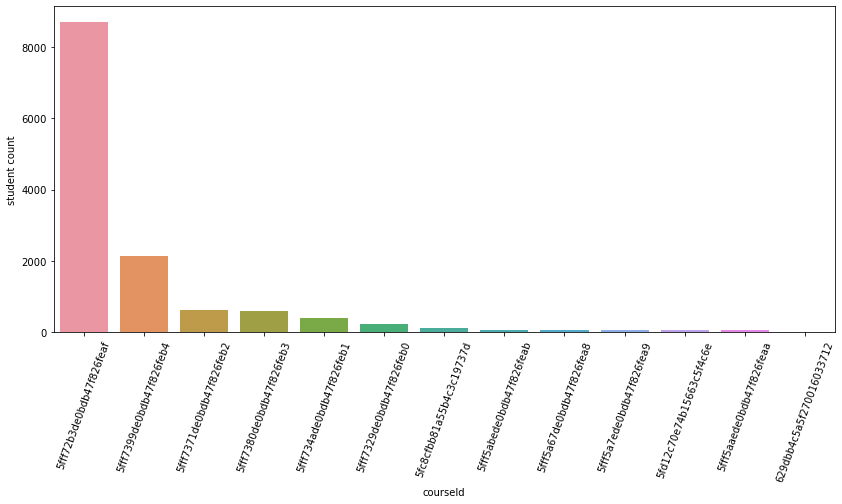

In [45]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=70)
sns.barplot(data=number_of_students,x='courseId',y='student count'
            ,order=number_of_students.sort_values('student count',ascending = False).courseId)
plt.show()

# Number of users per course

In [51]:
number_of_courses = enrolled_courses[['courseId','userId']].groupby(['userId']).agg(list)

In [53]:
number_of_courses = number_of_courses.reset_index()

In [54]:
number_of_courses['number of courses'] = number_of_courses['courseId'].apply(lambda x:len(set(x)))

In [59]:
number_of_courses[number_of_courses['number of courses']>1]

,userId,courseId,number of courses
31,601604c044b43c48f8a3a1b8,"[5fff734ade0bdb47f826feb1, 5fff7371de0bdb47f82...",2
45,601604c044b43c48f8a3a1c6,"[5fff72b3de0bdb47f826feaf, 5fff7371de0bdb47f82...",2
50,601604c044b43c48f8a3a1cb,"[5fff7380de0bdb47f826feb3, 5fff7399de0bdb47f82...",2
57,601604c044b43c48f8a3a1d2,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",3
69,601604c044b43c48f8a3a1de,"[5fff7371de0bdb47f826feb2, 5fff7380de0bdb47f82...",2
...,...,...,...
10904,61a5aa84b084830016832643,"[5fff7399de0bdb47f826feb4, 5fff7371de0bdb47f82...",2
11062,61be51aba132fe0016be0983,"[5fff7371de0bdb47f826feb2, 5fff734ade0bdb47f82...",2
11275,61cd5418d70c840016d370a4,"[5fff5aaede0bdb47f826feaa, 5fff5a67de0bdb47f82...",6
12505,6268ec130efdc00016cc89af,"[5fff7380de0bdb47f826feb3, 5fff7399de0bdb47f82...",2


In [60]:
number_of_courses[number_of_courses['number of courses']>5]

,userId,courseId,number of courses
89,601604c044b43c48f8a3a1f3,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",6
191,602e4bd458f23f05d209602f,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
214,603a1d9f88f8e80015827df3,"[5fff734ade0bdb47f826feb1, 5fff72b3de0bdb47f82...",6
233,603a32a988f8e80015827e32,"[5fff7329de0bdb47f826feb0, 5fff72b3de0bdb47f82...",6
257,603c9d866900f2001578a1ce,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",6
364,60704089a5a79c001505d24f,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",12
520,6082a59a3926fe29c8c7f1fd,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
539,6082a5aa3926fe29c8c7f223,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",13
2366,6082ab7e3926fe29c8c80069,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
4763,608cf4e9e697790015ee210d,"[nan, 5fff72b3de0bdb47f826feaf, 5fff7329de0bdb...",7


In [61]:
number_of_courses['number of courses'].value_counts()

1     12854
2        35
3        22
6        18
12        5
7         4
5         2
4         2
13        1
Name: number of courses, dtype: int64

C:\Users\alomo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number of courses', ylabel='count'>

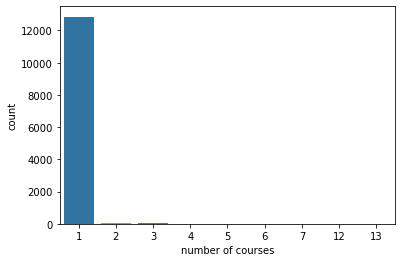

In [57]:
sns.countplot(number_of_courses['number of courses'])

In [42]:
number_of_courses[number_of_courses['courseId']>1] #just 91 students have taken more than 1 course

,courseId
userId,
601604c044b43c48f8a3a1b8,2
601604c044b43c48f8a3a1c6,2
601604c044b43c48f8a3a1cb,2
601604c044b43c48f8a3a1d2,3
601604c044b43c48f8a3a1de,2
...,...
61ace52cf77cd000167810fb,2
61be51aba132fe0016be0983,2
61cd5418d70c840016d370a4,6


# Recommender System

In [62]:
data = enrolled_courses[['userId','courseId']]

In [63]:
data

,userId,courseId
0,601604c044b43c48f8a3a1f3,5fff72b3de0bdb47f826feaf
1,601604c044b43c48f8a3a1fd,5fff72b3de0bdb47f826feaf
2,601604c044b43c48f8a3a1fb,5fff72b3de0bdb47f826feaf
3,601604c044b43c48f8a3a1fe,5fff72b3de0bdb47f826feaf
4,601604c044b43c48f8a3a204,5fff72b3de0bdb47f826feaf
...,...,...
13958,629d611bce674c00165d8788,5fff5abede0bdb47f826feab
13959,629d790cce674c00165d88de,5fff72b3de0bdb47f826feaf
13960,6082a5aa3926fe29c8c7f223,629dbb4c5a5f270016033712
13961,6138836b58490c00169f5333,629dbb4c5a5f270016033712


In [64]:
df = pd.get_dummies(data.set_index('userId')['courseId'].astype(str)).groupby(level=0).max().sort_index()

In [65]:
df

,5fc8cfbb81a55b4c3c19737d,5fd12c70e74b15663c5f4c6e,5fff5a67de0bdb47f826fea8,5fff5a7ede0bdb47f826fea9,5fff5aaede0bdb47f826feaa,5fff5abede0bdb47f826feab,5fff72b3de0bdb47f826feaf,5fff7329de0bdb47f826feb0,5fff734ade0bdb47f826feb1,5fff7371de0bdb47f826feb2,5fff7380de0bdb47f826feb3,5fff7399de0bdb47f826feb4,629dbb4c5a5f270016033712,nan
userId,,,,,,,,,,,,,,
601604c044b43c48f8a3a199,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601604c044b43c48f8a3a19a,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601604c044b43c48f8a3a19b,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601604c044b43c48f8a3a19c,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601604c044b43c48f8a3a19d,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629d2283f5c2e600161e8255,0,0,0,0,0,0,0,0,0,1,0,0,0,0
629d31f2ce674c00165d865a,0,0,0,0,0,0,1,0,0,0,0,0,0,0
629d611bce674c00165d8788,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
df = df.drop(['nan'],axis=1)

In [49]:
# check for frequent item sets

In [72]:
df = df.astype(bool)

In [80]:
minimum_support = 0.0001

In [81]:
frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)

In [82]:
frequent_itemsets

,support,itemsets
0,0.008962,(5fc8cfbb81a55b4c3c19737d)
1,0.004558,(5fd12c70e74b15663c5f4c6e)
2,0.005408,(5fff5a67de0bdb47f826fea8)
3,0.005331,(5fff5a7ede0bdb47f826fea9)
4,0.004327,(5fff5aaede0bdb47f826feaa)
...,...,...
4092,0.000464,"(5fff5a67de0bdb47f826fea8, 5fff72b3de0bdb47f82..."
4093,0.000464,"(5fff5a7ede0bdb47f826fea9, 5fff72b3de0bdb47f82..."
4094,0.000464,"(5fff5a7ede0bdb47f826fea9, 5fff5a67de0bdb47f82..."
4095,0.000464,"(5fff5a7ede0bdb47f826fea9, 5fff5a67de0bdb47f82..."


In [91]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
# Apply the frequent item sets to create association rules
rules.sort_values("support", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
105,(5fff734ade0bdb47f826feb1),(5fff72b3de0bdb47f826feaf),0.030905,0.671792,0.002936,0.09500,0.141413,-0.017826,0.362661
103,(5fff72b3de0bdb47f826feaf),(5fff7329de0bdb47f826feb0),0.671792,0.019238,0.002936,0.00437,0.227169,-0.009988,0.985067
102,(5fff7329de0bdb47f826feb0),(5fff72b3de0bdb47f826feaf),0.019238,0.671792,0.002936,0.15261,0.227169,-0.009988,0.387317
112,(5fff7329de0bdb47f826feb0),(5fff734ade0bdb47f826feb1),0.019238,0.030905,0.002936,0.15261,4.938092,0.002341,1.143624
113,(5fff734ade0bdb47f826feb1),(5fff7329de0bdb47f826feb0),0.030905,0.019238,0.002936,0.09500,4.938092,0.002341,1.083715


In [92]:
sorted_rules = rules.sort_values("lift", ascending=False)

In [93]:
def recommend_course(course):
    recommendation_list = []
    for i,product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == course:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])
    return recommendation_list

In [94]:
%%time
rec_courses = recommend_course("5fff5aaede0bdb47f826feaa")

CPU times: total: 52 s
Wall time: 57.4 s


In [99]:
recommended_courses = list(set(rec_courses))

In [100]:
recommended_courses[0:3]

['5fff5a7ede0bdb47f826fea9',
 '5fff5a67de0bdb47f826fea8',
 '5fff72b3de0bdb47f826feaf']

In [102]:
#enrolledcourses
lessons = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\lessons.csv")

In [103]:
lessons.head(10)

,_id,title
0,6012bdcecfe09249249f7e9c,Drawing And Labeling Of Farm Tools
1,6012bdcecfe09249249f7e9e,Types Of Insect And Part (Cockroach)
2,6012bdcecfe09249249f7ea0,Useful And Harmful Insect
3,6012bdcecfe09249249f7ea2,Controlling Harmful Insects
4,6012bdcecfe09249249f7ea4,Farmers Friend (Earthworm)
5,6012bdcecfe09249249f7ea8,Description Of Farmers Enemies
6,6012bdcecfe09249249f7eaa,Method Of Controlling Farmers Enemies
7,6012bdcecfe09249249f7ea6,Enemies Of Farmers (Rodent & Birds)
8,6012bdd3cfe09249249f7eac,Gathering And Carrying Tools
9,6012bdd3cfe09249249f7eb0,Maintenance Of Gathering And Carrying Tools


In [104]:
lessons['title'].nunique()

3486

In [105]:
lessons['_id'].nunique()

3737

In [106]:
len(lessons)

3737

In [4]:
#examresults
er = pd.read_csv("examresults.csv")

In [5]:
er.head()

,_id,status,userId,examId,timeSpent,results,score,numberOfCorrectAnswers,numberOfSkippedQuestions,numberOfWrongAnswers,percentage,remark,total,createdAt,updatedAt,__v
0,616ff267bae7580016355070,pending,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""616ff267bae7580016355071""},""q...",30,1,0,0,1.0,You were Excellent.,30,2021-10-20T10:41:43.933Z,2021-10-20T10:41:43.933Z,0
1,616ff5d4bae758001635512e,pending,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""616ff5d4bae758001635512f""},""q...",15,1,0,0,1.0,You were Excellent.,15,2021-10-20T10:56:20.281Z,2021-10-20T10:56:20.281Z,0
2,616ff65fbae7580016355143,marked,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""616ff65fbae7580016355144""},""q...",15,1,0,0,1.0,You were Excellent.,15,2021-10-20T10:58:39.235Z,2021-10-20T10:58:39.235Z,0
3,617bdf23fc556a00169f1180,marked,6154838ed1e76e5ff85b8b1e,616840fcdf6ca80c9c5a328a,1030,"[{""_id"":{""$oid"":""617bdf23fc556a00169f1181""},""q...",150,5,0,0,1.0,You were Excellent.,150,2021-10-29T11:46:43.047Z,2021-10-29T11:46:43.047Z,0
4,617be0c1fc556a00169f1187,pending,6154838ed1e76e5ff85b8b1e,617ac528401e8643c8353b32,1030,"[{""_id"":{""$oid"":""617be0c1fc556a00169f1188""},""q...",60,2,0,0,1.0,You were Excellent.,60,2021-10-29T11:53:37.541Z,2021-10-29T14:27:01.774Z,0


In [6]:
len(er)

43

In [11]:
#favorites
fv = pd.read_csv("favorites.csv")

In [12]:
fv.head()

,_id,userId,courseId,subjectId,lessonId,termId,createdAt,updatedAt,__v
0,618f90aaa24eec00162a6186,618e220d240b220016b86211,5fff7399de0bdb47f826feb4,60119d1731c66a2ebd9eb518,6013b8a63ea6f018108087fe,5fc8d1b20fae0a06bc22db5c,2021-11-13T10:17:14.911Z,2021-11-13T10:17:14.911Z,0
1,618f90aba24eec00162a6189,618e220d240b220016b86211,5fff7399de0bdb47f826feb4,60119d1731c66a2ebd9eb518,6013b8a63ea6f018108087fe,5fc8d1b20fae0a06bc22db5c,2021-11-13T10:17:15.181Z,2021-11-13T10:17:15.181Z,0
2,618f90cfa24eec00162a61e8,618e220d240b220016b86211,5fff7399de0bdb47f826feb4,60119d1731c66a2ebd9eb518,6013b8a63ea6f01810808800,5fc8d1b20fae0a06bc22db5c,2021-11-13T10:17:51.426Z,2021-11-13T10:17:51.426Z,0
3,618fca0ba24eec00162a7432,618c35cac07b8b0016b19bff,5fff7399de0bdb47f826feb4,60119d7b31c66a2ebd9eb526,6013b9d43ea6f018108089c4,5fc8d1b20fae0a06bc22db5c,2021-11-13T14:22:03.594Z,2021-11-13T14:22:03.594Z,0
4,6191cc65c80ef3001687e19b,615c62aa61c68f0016eb3918,5fff7399de0bdb47f826feb4,60119d1b31c66a2ebd9eb519,6013b8c03ea6f01810808820,5fc8d1b20fae0a06bc22db5c,2021-11-15T02:56:37.660Z,2021-11-15T02:56:37.660Z,0


In [13]:
len(fv)

87

In [14]:
#pastquestionprogresses
pqp = pd.read_csv("pastquestionprogresses.csv")

In [15]:
pqp.head()

,_id,__v
0,5ffc6dbaf5af02468c652fcf,0
1,5ffc6e05586b444810f3af9c,0
2,5ffc6ef6586b444810f3af9d,0
3,5ffc6f436dcc954a90957122,0
4,5ffc6f536dcc954a90957123,0


In [16]:
len(pqp)

3148

In [17]:
#pastquestionquizresults
pqqr = pd.read_csv("pastquestionquizresults.csv")

In [18]:
pqqr.head()

,_id,results,userId,classId,courseId,timeSpent,numberOfCorrectAnswers,numberOfWrongAnswers,numberOfSkippedQuestions,score,remark,__v
0,5ffd5889675630077832c703,"[{""_id"":{""$oid"":""5ffd5889675630077832c704""},""q...",5fd66fb678385d3c8098f880,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
1,5ffd5a546f091d409ceaa1b6,"[{""_id"":{""$oid"":""5ffd5a546f091d409ceaa1b7""},""q...",5ffd5a286f091d409ceaa19d,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
2,5ffd5b1c377e324d0c62f30f,"[{""_id"":{""$oid"":""5ffd5b1c377e324d0c62f310""},""q...",5ffd5ab5377e324d0c62f2f8,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
3,5ffd5b4146f4e821ac738b45,"[{""_id"":{""$oid"":""5ffd5b4146f4e821ac738b46""},""q...",5ffd5b2a46f4e821ac738b2c,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0
4,5ffd5cae5be7fe038c19317f,"[{""_id"":{""$oid"":""5ffd5cae5be7fe038c193180""},""q...",5ffd5c6b5be7fe038c193166,5fc8e7134bfe993c34a9689c,5fc8e7134bfe993c34a9689c,233,2,3,2,2,You can be better,0


In [19]:
len(pqqr)

3242

In [20]:
#quizresults
qr = pd.read_csv("quizresults.csv")

In [21]:
qr.head()

,_id,userId,classId,courseId,lessonId,subjectId,timeSpent,numberOfCorrectAnswers,numberOfWrongAnswers,numberOfSkippedQuestions,score,remark,createdAt,updatedAt,__v
0,5fc8fe4edc422b3a2cb7b606,5fd66fb678385d3c8098f880,5fc8d2a4b55ab52a40d75a54,5fc8cfbb81a55b4c3c19737d,5fd304b5a3181bf4ca54f89c,5fff5bab3fd2d54b08047c82,40,2.0,3.0,1.0,80.0,You can do better,2020-12-03T15:03:42.102Z,2020-12-03T15:03:42.102Z,0
1,5fcf72eb621bce30441384b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T12:34:51.646Z,2020-12-08T12:34:51.646Z,0
2,5fcf792a7cd91b0eb41249fb,NaN,NaN,NaN,5fc8e7134bfe993c34a9689c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T13:01:30.955Z,2020-12-08T13:01:30.955Z,0
3,5fcf7b08df08090a90217528,NaN,NaN,NaN,5fc8e7134bfe993c34a9689c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T13:09:28.418Z,2020-12-08T13:09:28.418Z,0
4,5fcf7b15e0027a1d54047779,NaN,NaN,NaN,5fc8e7134bfe993c34a9689c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08T13:09:41.642Z,2020-12-08T13:09:41.642Z,0


In [22]:
len(qr)

818

In [23]:
#recentactivities
rac = pd.read_csv("recentactivities.csv")

In [24]:
rac.head()

,_id,lessonId,type,userId,createdAt,updatedAt,__v
0,609a3909f3e4905f0001f3de,6012d1b0cfe09249249f8954,lesson,6096464f42cd50554895e250,2021-05-11T07:58:01.630Z,2021-05-11T07:58:01.630Z,0
1,609a3a8bf3e4905f0001f3e0,6012cec2cfe09249249f88fe,lesson,6096464f42cd50554895e250,2021-05-11T08:04:27.541Z,2021-05-11T08:04:27.541Z,0
2,609a4259f3e4905f0001f3e2,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:37:45.403Z,2021-05-11T08:37:45.403Z,0
3,609a42dff3e4905f0001f3e5,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.882Z,2021-05-11T08:39:59.882Z,0
4,609a42dff3e4905f0001f3e6,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.896Z,2021-05-11T08:39:59.896Z,0


In [25]:
len(rac)

21709

In [27]:
rac['_id'].nunique()

21709

In [29]:
#resumeplayings
rp = pd.read_csv("resumeplayings.csv")

In [30]:
rp.head()

,_id,userId,courseId,subjectId,lessonId,termId,createdAt,updatedAt,__v
0,61784b4afd921f00161608f7,60e75b42df20f743607ab52e,5fff72b3de0bdb47f826feaf,60119a4131c66a2ebd9eb4d0,6012d1b0cfe09249249f8954,5fc8d1b20fae0a06bc22db5c,2021-10-26T18:39:06.060Z,2021-10-26T18:39:06.060Z,0
1,617c61f2b736b70016b4427f,617c5a2db736b70016b44151,5fff72b3de0bdb47f826feaf,60119a5d31c66a2ebd9eb4d4,6012d2bccfe09249249f8a12,5fc8d1b20fae0a06bc22db5c,2021-10-29T21:04:50.927Z,2021-10-29T21:04:50.927Z,0
2,617c64d4b736b70016b44314,617c5a2db736b70016b44151,5fff72b3de0bdb47f826feaf,60119a7431c66a2ebd9eb4d7,6012d31fcfe09249249f8a9c,5fc8d1b20fae0a06bc22db5c,2021-10-29T21:17:08.460Z,2021-10-29T21:17:08.460Z,0
3,618037a51a5eec0016682922,6162e16577c6310016e7f261,5fff734ade0bdb47f826feb1,60119ba131c66a2ebd9eb4ee,6012d7abcfe09249249f8ebe,600048197cabf80f88f61736,2021-11-01T18:53:25.139Z,2021-11-01T18:53:25.139Z,0
4,6181090aaf49b300162ba557,615618c778a374001601f15d,5fff7371de0bdb47f826feb2,60119c2931c66a2ebd9eb4fe,6012d94ecfe09249249f9222,5fc8d1b20fae0a06bc22db5c,2021-11-02T09:46:50.722Z,2021-11-02T09:46:50.722Z,0


In [31]:
len(rp)

480

In [32]:
#subjectprogresses
subp = pd.read_csv("subjectprogresses.csv")

In [33]:
subp.head()

,_id,classId,lessonId,subjectId,courseId,userId,createdAt,updatedAt,__v
0,6030061fe09d7f0e74107668,60224d726460b71eb90581a7,6012bdcecfe09249249f7e9c,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,60224d726460b71eb90581a5,2021-02-19T18:40:31.010Z,2021-02-19T18:40:31.010Z,0
1,60300641e09d7f0e7410766b,NaN,6012cec2cfe09249249f88fe,60119a3331c66a2ebd9eb4cf,5fff72b3de0bdb47f826feaf,6016567a31c66a2ebd9eb56a,2021-02-19T18:41:05.669Z,2021-02-19T18:41:05.669Z,0
2,6030505769746d34c8265aa0,60224d726460b71eb90581a7,6012bdd3cfe09249249f7eac,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,60224d726460b71eb90581a5,2021-02-19T23:57:11.213Z,2021-02-19T23:57:11.213Z,0
3,6030511669746d34c8265aa3,NaN,6012d2abcfe09249249f89f4,60119a5531c66a2ebd9eb4d3,5fff72b3de0bdb47f826feaf,6016567a31c66a2ebd9eb56a,2021-02-20T00:00:22.871Z,2021-02-20T00:00:22.871Z,0
4,6030e91f4ad46f1ec0a932a5,NaN,6012bdcecfe09249249f7e9c,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,602bd4ae29299e2bbcd9f9e4,2021-02-20T10:49:03.517Z,2021-02-20T10:49:03.517Z,0


In [34]:
len(subp)

13989